# Householder transformation

### References

* Lawson, C. L,. and Hanson, R. J. (1995). Solving least squares problems. SIAM, ISBN 0-89871-356-0

* Golub, G. H. and C. F. Van Loan, (2013), Matrix computations, 4th edition, Johns Hopkins University Press, ISBN 978-1-4214-0794-4.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import QR_algorithms as qra
#np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

### Definition

A *Householder trasformation* $\mathbf{P}$ (also known as *Householder reflection* or *Householder matrix*) is an $M \times M$ symmetric and orthogonal matrix given by:

<a id='eq1a'></a>
$$
\mathbf{P} = \mathbf{I} - \beta \, \mathbf{v} \cdot \mathbf{v}^{\top} \quad , \tag{1a}
$$

<a id='eq1b'></a>
$$
\beta = \frac{2}{\mathbf{v}^{\top}\mathbf{v}} \quad , \tag{1b}
$$

where $\mathbf{v}$ is called *Householder vector*.

### Create synthetic data

In [2]:
np.random.seed(6)
M = 13

In [3]:
x = np.random.rand(M)

In [4]:
v, beta = qra.House_vector(x)

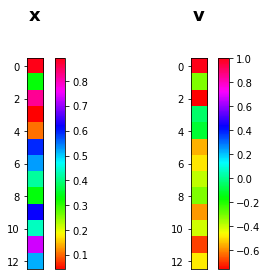

In [5]:
plt.figure(figsize=(6,4))

plt.subplot(121)
plt.title('$\mathbf{x}$\n', fontsize=18)
plt.matshow(np.reshape(x, (M,1)), fignum=0, cmap='hsv')
plt.colorbar()
plt.xticks([])

plt.subplot(122)
plt.title('$\mathbf{v}$\n', fontsize=18)
plt.matshow(np.reshape(v, (M,1)), fignum=0, cmap='hsv')
plt.colorbar()
plt.xticks([])

plt.tight_layout()
plt.show()

### Properties

In [6]:
# Create the Householder transformation
P = np.identity(M) - beta*np.outer(v,v)

In [7]:
np.allclose(np.dot(P.T,P), np.dot(P,P.T))

True

In [8]:
np.allclose(np.identity(M), np.dot(P,P.T))

True

In [9]:
Px = np.dot(P,x)

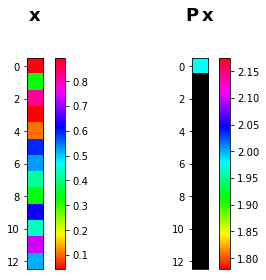

In [10]:
cmap = plt.cm.hsv
cmap.set_bad(color='black')

plt.figure(figsize=(6,4))

plt.subplot(121)
plt.title('$\mathbf{x}$\n', fontsize=18)
plt.matshow(np.reshape(x, (M,1)), fignum=0, cmap="hsv")
plt.colorbar()
plt.xticks([])

plt.subplot(122)
plt.title('$\mathbf{P \, x}$\n', fontsize=18)
Px_masked = np.ma.masked_where(Px < 1e-15, Px)
plt.matshow(np.reshape(Px_masked, (M,1)), fignum=0, cmap=cmap)
plt.colorbar()
plt.xticks([])

plt.tight_layout()
plt.show()

In [11]:
np.allclose(Px[0], np.linalg.norm(x))

True

In [12]:
v, beta = qra.House_vector(x[4:])

In [13]:
# Create the Householder transformation
P = np.identity(M-4) - beta*np.outer(v,v)

In [14]:
Px = np.hstack([x[:4], np.dot(P,x[4:])])

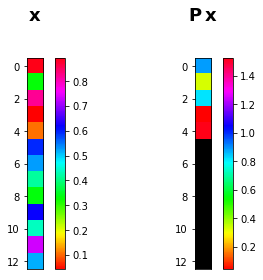

In [15]:
cmap = plt.cm.hsv
cmap.set_bad(color='black')

plt.figure(figsize=(6,4))

plt.subplot(121)
plt.title('$\mathbf{x}$\n', fontsize=18)
plt.matshow(np.reshape(x, (M,1)), fignum=0, cmap="hsv")
plt.colorbar()
plt.xticks([])

plt.subplot(122)
plt.title('$\mathbf{P \, x}$\n', fontsize=18)
Px_masked = np.ma.masked_where(Px < 1e-15, Px)
plt.matshow(np.reshape(Px_masked, (M,1)), fignum=0, cmap=cmap)
plt.colorbar()
plt.xticks([])

plt.tight_layout()
plt.show()